# LLM Logic Test Visualizations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\leost\Downloads\AnalystBuilder\LLM Logic Analysis\LLM Logic Test Observations.xlsx", index_col = 'Index')

In [4]:
df

,Category,Prompt,Expected Answer,Model,Model Response,Correct? (Y/N),Reason for Score,Comparative Notes/Observations
Index,,,,,,,,
1,Game Mechanics,UNO,No,ChatGPT 4o,"No, Player C’s move was not legal.\n\nLet's br...",Y,Correctly answered with sound reasoning.,"All three referenced the correct rule, listed ..."
2,Game Mechanics,UNO,No,Claude 3.7 Sonnet,Player C's move was not legal in UNO.\nAccordi...,Y,Correctly answered with sound reasoning.,"All three referenced the correct rule, listed ..."
3,Game Mechanics,UNO,No,DeepThink R1,Player C's move was not legal.\n\nHere's the b...,Y,Correctly answered with sound reasoning.,"All three referenced the correct rule, listed ..."
4,Game Mechanics,Durak,Yes,ChatGPT 4o,"In Durak, a card is only legal to play if it m...",N,"Noted the informal legal-cheating rules, but s...",Each model correctly defined the ruling accord...
5,Game Mechanics,Durak,Yes,Claude 3.7 Sonnet,"No, the 7♠ does not become legal retroactively...",N,Did not acknowledge any house rules.,Each model correctly defined the ruling accord...
6,Game Mechanics,Durak,Yes,DeepThink R1,"In Durak, the legality of a card played is det...",N,Mentioned house rules but only for penalizatio...,Each model correctly defined the ruling accord...
7,Game Mechanics,I'm Going Camping,Yes,ChatGPT 4o,Let's look for a hidden pattern in the items p...,Y,"Correctly answered with correct reasoning, how...",Claude responded the quickest but was incorrec...
8,Game Mechanics,I'm Going Camping,Yes,Claude 3.7 Sonnet,Let me think through this step by step.\nFor t...,P,"Claude was partially correct, having answered ...",Claude responded the quickest but was incorrec...
9,Game Mechanics,I'm Going Camping,Yes,DeepThink R1,The key to determining whether Gina can bring ...,P,"DeepSeek was partially correct, having answere...",Claude responded the quickest but was incorrec...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1 to 45
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Category                        45 non-null     object
 1   Prompt                          45 non-null     object
 2   Expected Answer                 45 non-null     object
 3   Model                           45 non-null     object
 4   Model Response                  45 non-null     object
 5   Correct? (Y/N)                  45 non-null     object
 6   Reason for Score                45 non-null     object
 7   Comparative Notes/Observations  45 non-null     object
dtypes: object(8)
memory usage: 3.2+ KB


In [6]:
pivot_df = df.groupby(['Model', 'Correct? (Y/N)']).size().unstack(fill_value=0)
pivot_df

Correct? (Y/N),N,P,Y
Model,,,
ChatGPT 4o,1,1,13
Claude 3.7 Sonnet,1,1,13
DeepThink R1,1,2,12


In [7]:
pivot_df = pivot_df[['Y', 'P', 'N']]

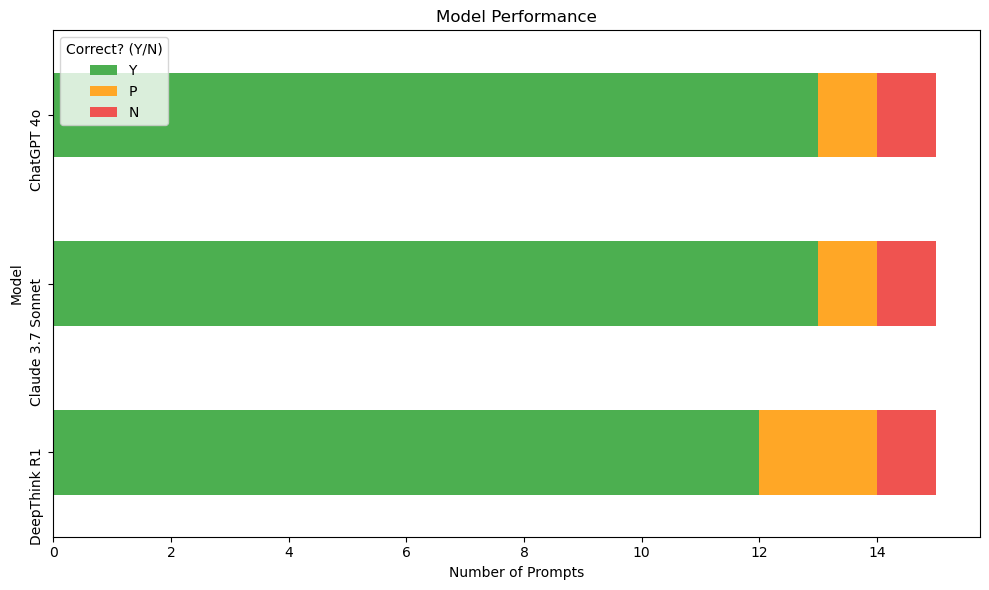

In [8]:
pivot_df.sort_values(by='Model', ascending = False).plot(kind='barh', stacked=True, figsize=(10, 6), color = ['#4CAF50', '#FFA726', '#EF5350'])

plt.title('Model Performance')
plt.xlabel('Number of Prompts')
plt.ylabel('Model')
plt.yticks(rotation=90)
plt.tight_layout()

In [9]:
df.groupby(['Category', 'Model', 'Correct? (Y/N)']).size().unstack(fill_value=0)

Correct? (Y/N)                                               N  P  Y
Category                                  Model                     
Fictional World Rules (Constructed Logic) ChatGPT 4o         0  0  3
                                          Claude 3.7 Sonnet  0  0  3
                                          DeepThink R1       0  0  3
Game Mechanics                            ChatGPT 4o         1  0  2
                                          Claude 3.7 Sonnet  1  1  1
                                          DeepThink R1       1  1  1
Pattern & Deduction Puzzles               ChatGPT 4o         0  0  3
                                          Claude 3.7 Sonnet  0  0  3
                                          DeepThink R1       0  0  3
Procedural Tasks & Cause-Effect           ChatGPT 4o         0  0  3
                                          Claude 3.7 Sonnet  0  0  3
                                          DeepThink R1       0  0  3
Social Fairness & Turn-Taking             ChatGPT 4o         0  1  2
                                          Claude 3.7 Sonnet  0  0  3
                                          DeepThink R1       0  1  2

In [10]:
category_scores = df.groupby(['Category', 'Correct? (Y/N)']).size().unstack(fill_value=0)
category_scores

Correct? (Y/N),N,P,Y
Category,,,
Fictional World Rules (Constructed Logic),0,0,9
Game Mechanics,3,2,4
Pattern & Deduction Puzzles,0,0,9
Procedural Tasks & Cause-Effect,0,0,9
Social Fairness & Turn-Taking,0,2,7


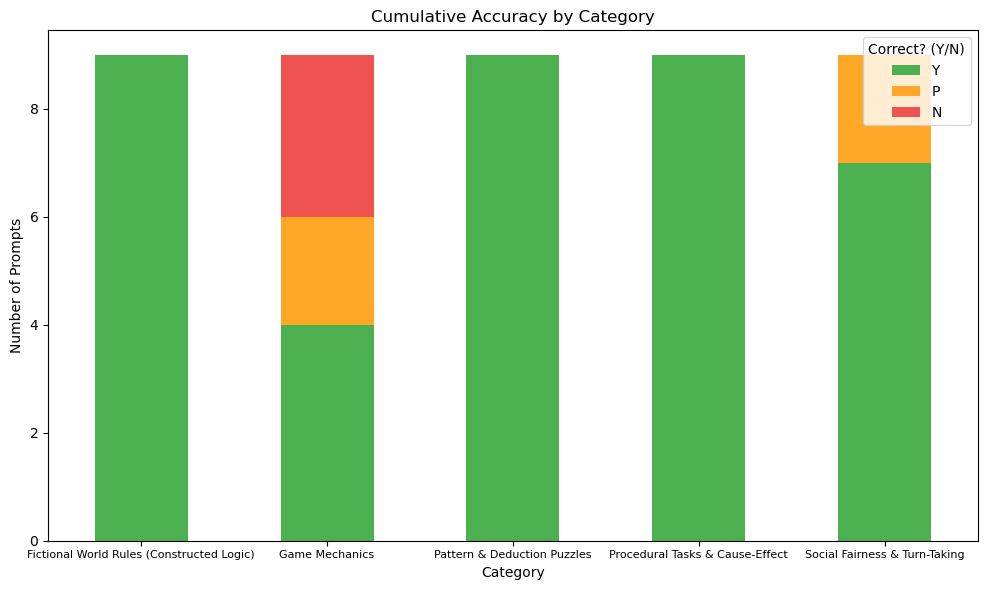

In [11]:
category_scores[['Y', 'P', 'N']].plot(kind='bar', stacked=True, figsize=(10, 6), color = ['#4CAF50', '#FFA726', '#EF5350'])

plt.title('Cumulative Accuracy by Category')
plt.xlabel('Category')
plt.ylabel('Number of Prompts')
plt.xticks(rotation=0, ha='center', fontsize=8)
plt.tight_layout()

In [12]:
heatmap_data = df[df['Correct? (Y/N)'] == 'Y'].groupby(['Category', 'Model']).size().unstack(fill_value=0)
heatmap_data

Model,ChatGPT 4o,Claude 3.7 Sonnet,DeepThink R1
Category,,,
Fictional World Rules (Constructed Logic),3,3,3
Game Mechanics,2,1,1
Pattern & Deduction Puzzles,3,3,3
Procedural Tasks & Cause-Effect,3,3,3
Social Fairness & Turn-Taking,2,3,2


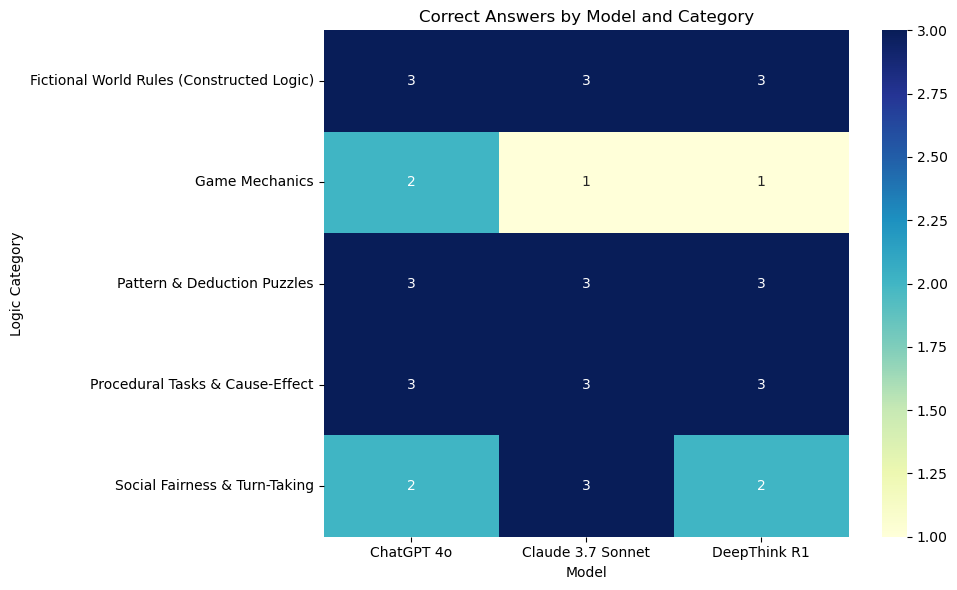

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Correct Answers by Model and Category')
plt.xlabel('Model')
plt.ylabel('Logic Category')
plt.tight_layout()

In [26]:
# Exporting Plots to PNGs.

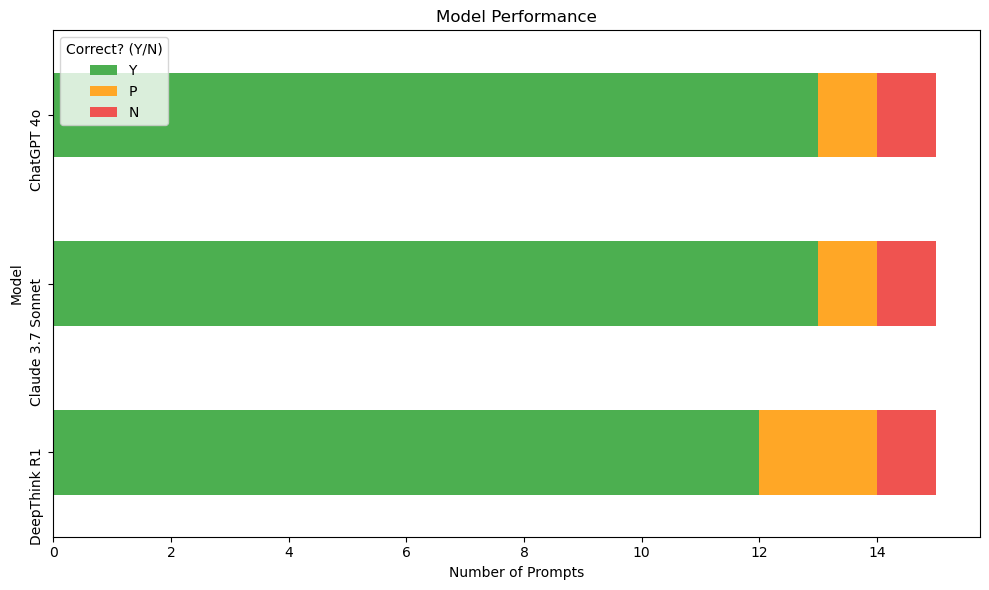

In [30]:
pivot_df.sort_values(by='Model', ascending = False).plot(kind='barh', stacked=True, figsize=(10, 6), color = ['#4CAF50', '#FFA726', '#EF5350'])

plt.title('Model Performance')
plt.xlabel('Number of Prompts')
plt.ylabel('Model')
plt.yticks(rotation=90)
plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')

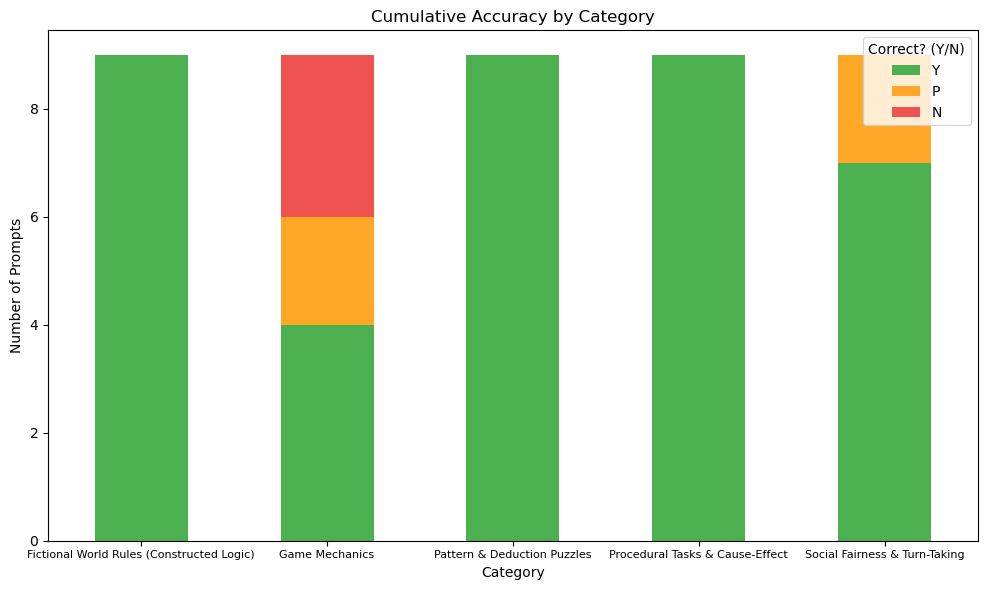

In [32]:
category_scores[['Y', 'P', 'N']].plot(kind='bar', stacked=True, figsize=(10, 6), color = ['#4CAF50', '#FFA726', '#EF5350'])

plt.title('Cumulative Accuracy by Category')
plt.xlabel('Category')
plt.ylabel('Number of Prompts')
plt.xticks(rotation=0, ha='center', fontsize=8)
plt.tight_layout()
plt.savefig('category_accuracy.png', dpi=300, bbox_inches='tight')

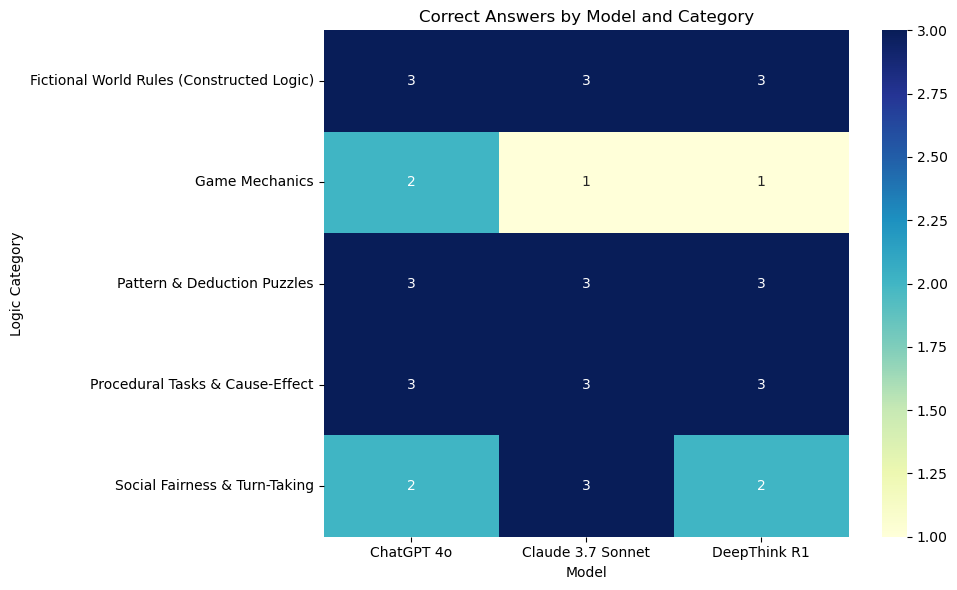

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Correct Answers by Model and Category')
plt.xlabel('Model')
plt.ylabel('Logic Category')
plt.tight_layout()
plt.savefig('model_and_category.png', dpi=300, bbox_inches='tight')